# Chapter 08 이미지를 위한 인공 신경망

## 08-1 합성곱 신경망의 구성 요소

**합성곱**<br>
입력 데이터에 마법의 도장을 찍어서 유용한 특성만 드러나게 하는 것

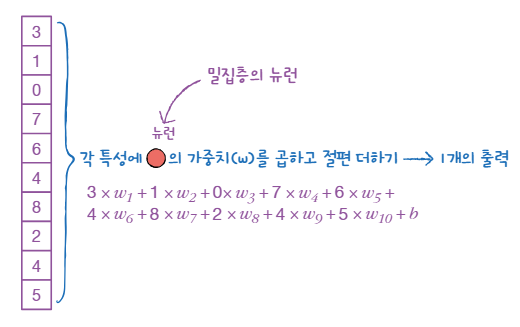

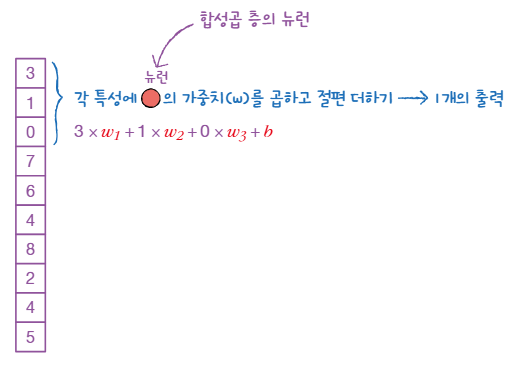

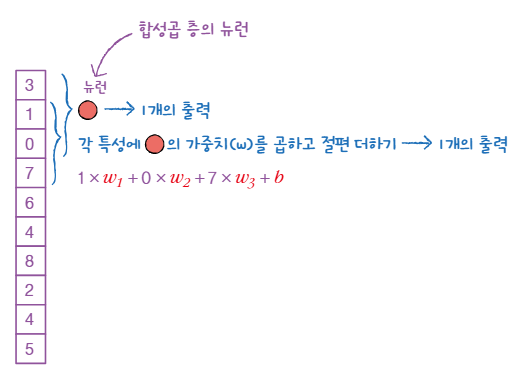

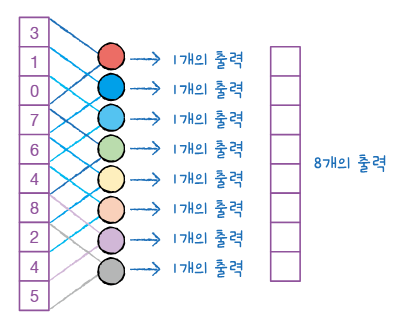

**합성곱 신경망(CNN)**<br>
사진이나 영상을 처리할 때 주로 사용하는 인공지능 모델로, 이미지 속에서 중요한 특징(선, 모서리, 색깔 등)을 스스로 찾아내는 구조

**필터(filter)**<br>
이미지의 특정 부분을 보고 중요한 특징을 뽑아내는 작은 창 같은 도구

**커널(kernel)**<br>
필터와 같은 의미로 사용되는 용어

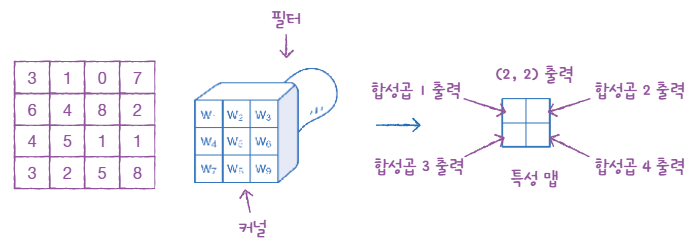

**특성 맵(feature map)**<br>
합성곱 계산을 통해 얻은 출력 결과

### 케라스 합성곱 층

In [ ]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')

<Conv2D name=conv2d_1, built=False>

합성곱 신경망 => 1개 이상의 합성곱 층을 쓴 인공 신경망

**패딩(padding)**<br>
입력 배열의 주위를 가상의 원소로 채우는 것

**세임 패딩(same padding)**<br>
입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩 하는 것

**밸리드 패딩(valid padding)**<br>
패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우

**스트라이드(stride)**<br>
필터(커널)가 데이를 훑을 때 한 번에 몇 칸씩 이동할지를 정하는 값

**풀링(pooling)**<br>
합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행함

**최대 풀링(max pooling)**<br>
도장을 찍은 영역에서 가장 큰 값을 고름

**평균 풀링(average pooling)**<br>
도장을 찍은 영역에서 평균값을 계산함

In [ ]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

<Conv2D name=conv2d_2, built=False>

In [ ]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu',
                    padding='same', strides=1)

<Conv2D name=conv2d_3, built=False>

In [ ]:
keras.layers.MaxPooling2D(2)

<MaxPooling2D name=max_pooling2d, built=True>

In [ ]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

<MaxPooling2D name=max_pooling2d_1, built=True>

### 합성곱 신경망의 전체 구조

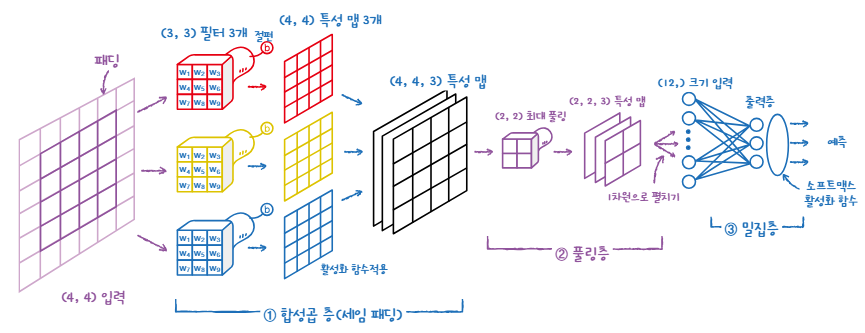

## 08-2 합성곱 신경망을 사용한 이미지 분류

- `Conv2D`: 2D 합성곱 연산 클래스  
  (*매개변수* – `filters` / `kernel_size` / `strides` / `padding` / `activation`)  
  - `filters`: 합성곱 필터(커널)의 개수  
  - `kernel_size`: 커널의 크기  
  - `strides`: 필터 이동 간격  
  - `padding`: 입력 패딩 방식 ('valid' 또는 'same')  
  - `activation`: 활성화 함수 지정

- `MaxPooling2D`: 2D 최대 풀링 클래스  
  (*매개변수* – `pool_size` / `strides`)  
  - `pool_size`: 풀링 윈도우 크기  
  - `strides`: 풀링 이동 간격

- `plot_model()`: 케라스 모델 구조 시각화 함수  
  (*매개변수* – `to_file` / `show_shapes` / `show_layer_names`)  
  - `to_file`: 저장할 파일 이름  
  - `show_shapes`: 층의 입출력 크기 표시  
  - `show_layer_names`: 층 이름 표시

- `bar()`: 막대그래프 출력 함수 (matplotlib)  
  (*매개변수* – `x` / `height` / `width`)  
  - `x`: 막대 위치  
  - `height`: 막대 높이  
  - `width`: 막대 두께 (기본값 0.8)

### 패션 MNIST 데이터 불러오기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
          padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
          padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

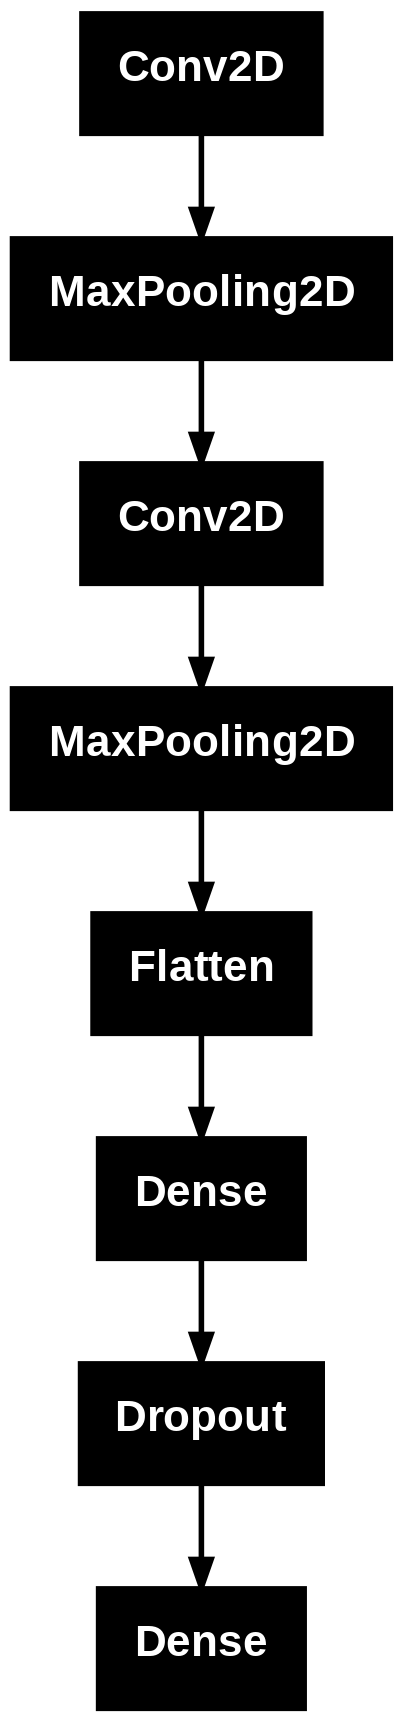

In [ ]:
keras.utils.plot_model(model)

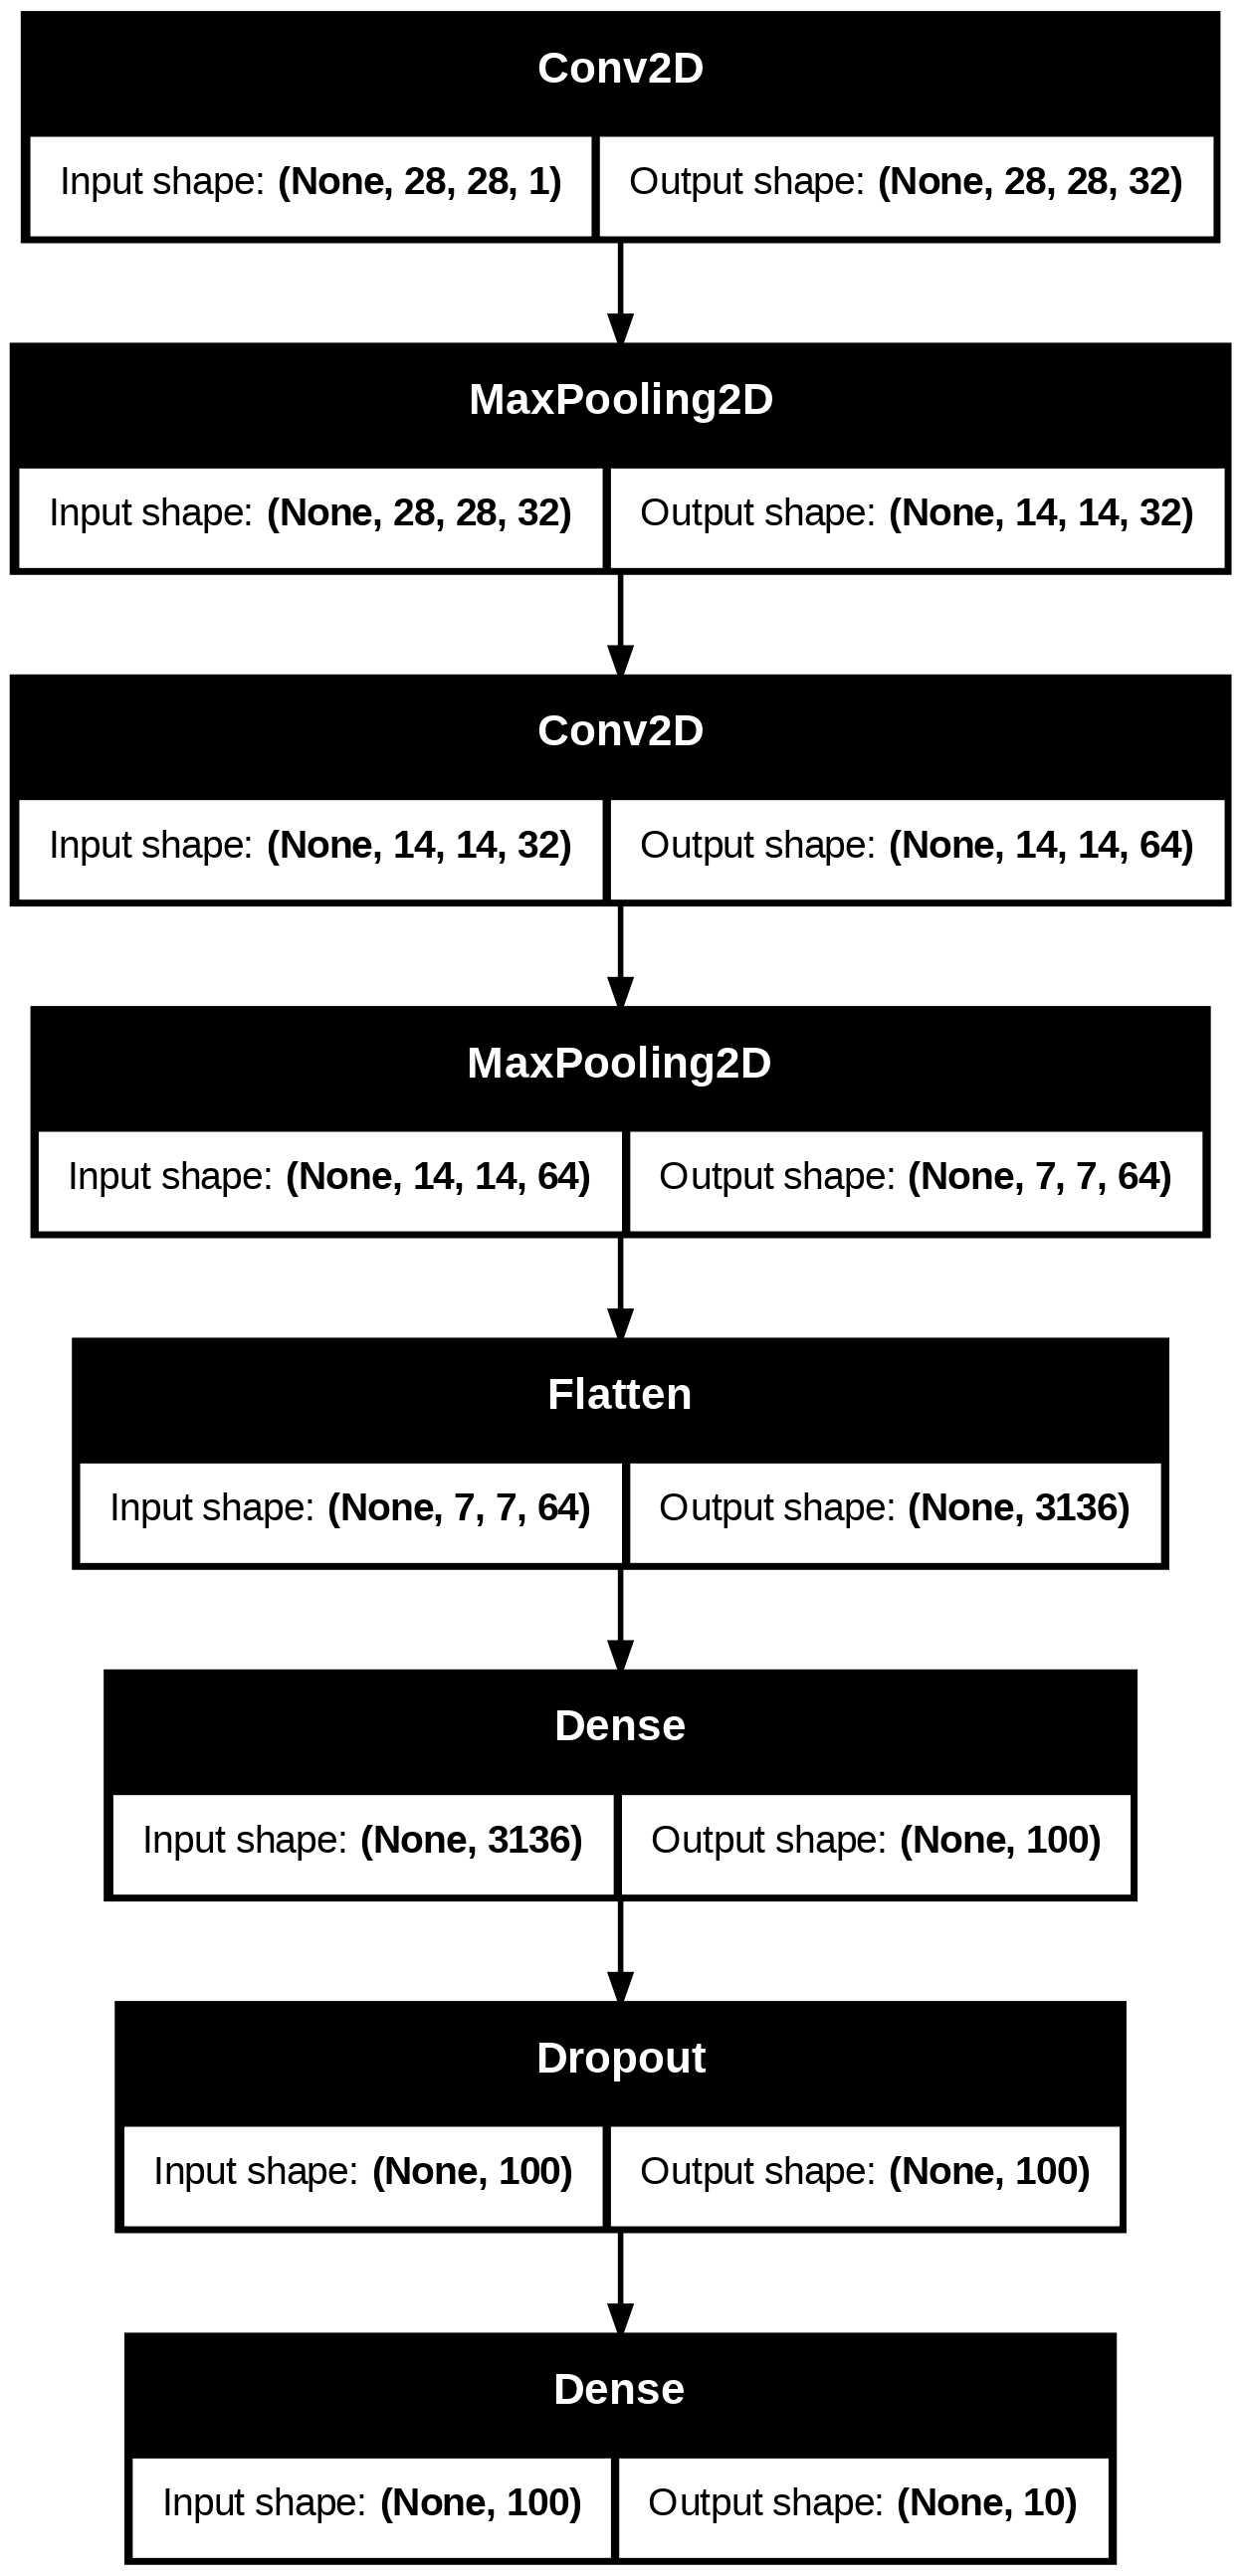

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

### 모델 컴파일과 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 45ms/step - accuracy: 0.7402 - loss: 0.7332 - val_accuracy: 0.8760 - val_loss: 0.3319
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.8697 - loss: 0.3573 - val_accuracy: 0.8945 - val_loss: 0.2842
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.8893 - loss: 0.3066 - val_accuracy: 0.9077 - val_loss: 0.2519
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.9057 - loss: 0.2601 - val_accuracy: 0.9086 - val_loss: 0.2483
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9108 - loss: 0.2402 - val_accuracy: 0.9120 - val_loss: 0.2451
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 44ms/step - accuracy: 0.9206 - loss: 0.2176 - val_accuracy: 0.9172 - val_loss: 0.2332
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9269 - loss: 0.1961 - val_accuracy: 0.9194 - val_loss: 0.2224
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.9292 -

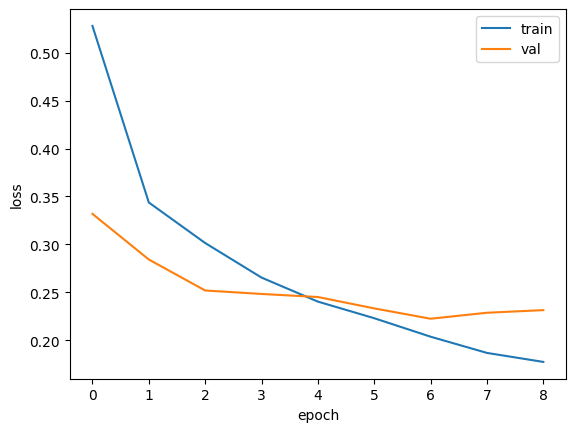

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9212 - loss: 0.2160


[0.22244995832443237, 0.9194166660308838]

<function matplotlib.pyplot.show(close=None, block=None)>

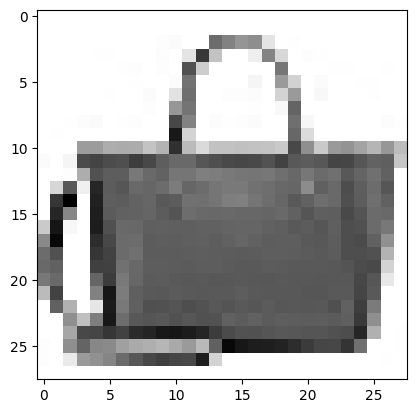

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
[[4.1136939e-16 1.0617410e-22 7.1566078e-16 4.9498869e-16 5.5177235e-16
  8.7680111e-19 8.0130985e-15 1.8542498e-17 1.0000000e+00 1.0001010e-19]]


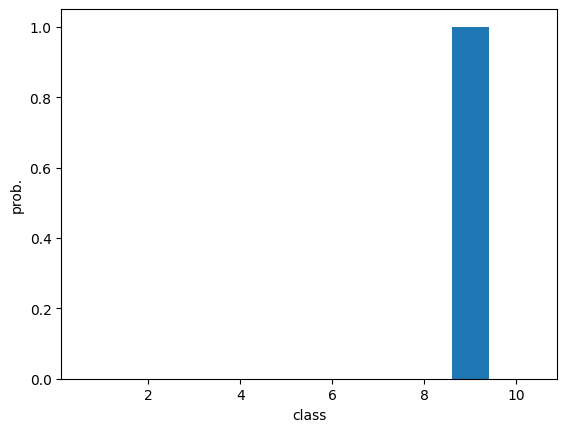

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9088 - loss: 0.2614


[0.24559257924556732, 0.9111999869346619]